In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes of pregencies.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
x = data.iloc[:,0: 8] 
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y = data['Outcome'] 
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 43)

In [12]:
from sklearn.preprocessing import StandardScaler 

In [13]:
scaler = StandardScaler() 
scaler.fit(x_train) 

StandardScaler()

In [14]:
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test) 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV  
from sklearn import metrics

In [17]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130,150,200,250,300], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(1, 5, 1), 
            'max_features': ['auto', 'log2']
        }
    }
}

In [18]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5)
    model_selection.fit(x_train_scaled,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [19]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.767119818739171,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 130}}]

In [21]:
model = RandomForestClassifier(n_estimators = 130,criterion = 'gini',max_depth = 3, max_features = 'log2',  ) 
model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=130)

In [22]:
Random_prediction = model.predict(x_test_scaled)
Random_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [25]:
print("The Accuarcy of the model is :",metrics.accuracy_score(y_test,Random_prediction)*100)

The Accuarcy of the model is : 75.32467532467533


<Axes: title={'center': 'Confusion Matrix'}>

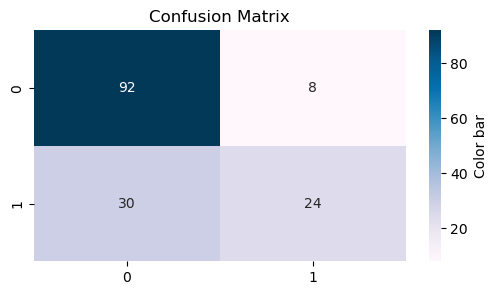

In [27]:
cm = metrics.confusion_matrix(y_test,Random_prediction)
plt.figure(figsize=(6,3)) 
plt.title("Confusion Matrix")
sns.heatmap(cm,cmap = "PuBu",annot = True,xticklabels=[0,1],yticklabels= [0,1],cbar_kws = {'orientation':'vertical','label':'Color bar'},fmt='g')

In [28]:
import pickle

In [31]:
filename = 'Diabetics_predictor.sav'

In [32]:
pickle.dump(model,open(filename,'wb'))

In [33]:
loaded_model = pickle.load(open('Diabetics_predictor.sav','rb'))

SyntaxError: invalid syntax (464634962.py, line 1)

In [59]:
print(scikit-learn.__version__)

NameError: name 'scikit' is not defined